# Business Sales Performance Analytics

## Task 1 – Data Science & Analytics Internship (Future Interns)

### Objective
The objective of this analysis is to examine historical sales data to identify
revenue trends, top-selling products, high-value categories, and regional
performance, and to provide actionable business recommendations based on insights.


In [43]:
import pandas as pd


df = pd.read_csv("train.csv")


df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [44]:
df.shape

(9800, 18)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

## Dataset Understanding

The dataset contains historical sales transactions from a retail superstore.
It includes information about order dates, shipping details, customer segments,
product categories, regions, and sales values.

This analysis focuses on identifying revenue trends, top-performing products,
high-value categories, and regional sales performance to support
data-driven business decisions.


## Data Cleaning

In this step, the dataset is checked for missing values, duplicate records,
and incorrect data types. Necessary cleaning steps are applied to ensure
data quality and reliability of the analysis.
Mixed date formats were handled using robust datetime parsing to ensure consistency.

In [46]:
df.isnull().sum()


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [47]:
df['Postal Code'] = df['Postal Code'].fillna(0)


In [48]:
df.duplicated().sum()
df = df.drop_duplicates()

In [50]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, errors='coerce')


In [51]:
df[['Order Date', 'Ship Date']].head()
df[['Order Date', 'Ship Date']].isnull().sum()


Order Date    0
Ship Date     0
dtype: int64

## Feature Engineering

To support time-based analysis, new features such as Year and Month
are extracted from the Order Date column.


## Feature Engineering

To support time-based analysis, new features such as Year and Month
are extracted from the Order Date column.


In [52]:
# Extract year and month from Order Date
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month


In [53]:
df[['Order Date', 'Year', 'Month']].head()


,Order Date,Year,Month
0,2017-11-08,2017,11
1,2017-11-08,2017,11
2,2017-06-12,2017,6
3,2016-10-11,2016,10
4,2016-10-11,2016,10


## Revenue Trend Analysis

This section analyzes how revenue changes over time to identify
growth patterns and seasonality.


In [54]:
monthly_sales = (
    df.groupby(['Year', 'Month'])['Sales']
    .sum()
    .reset_index()
)

monthly_sales.head()


,Year,Month,Sales
0,2015,1,14205.707
1,2015,2,4519.892
2,2015,3,55205.797
3,2015,4,27906.855
4,2015,5,23644.303


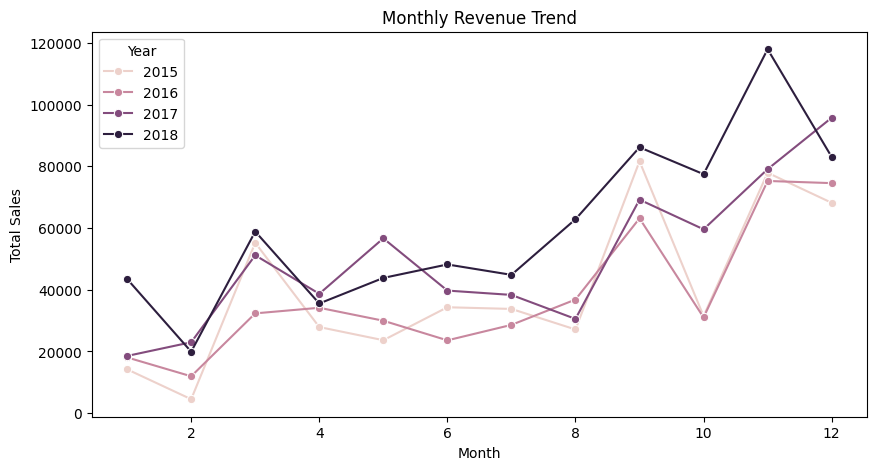

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


## Revenue Trend Insights

- Revenue shows an overall upward trend across the years, indicating business growth.
- Sales tend to increase significantly during the last quarter (September–December),
  suggesting strong seasonal demand.
- The year 2018 records the highest monthly revenues, especially in November,
  highlighting peak performance during this period.
- Early months (January–February) consistently show lower sales, indicating
  potential opportunities for promotional strategies.


## Product Performance Analysis

This section identifies the top-selling products based on total revenue
to understand key revenue drivers.


In [56]:
top_products = (
    df.groupby('Product Name')['Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products


Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64

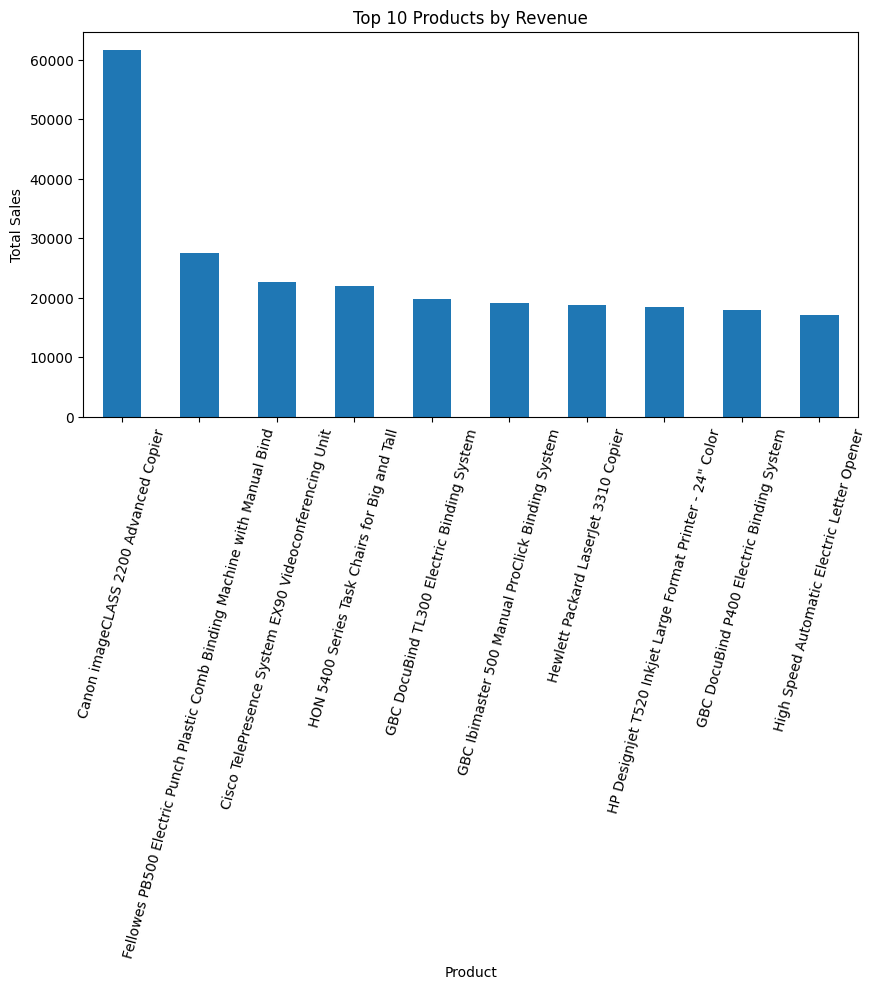

In [57]:
plt.figure(figsize=(10, 5))
top_products.plot(kind='bar')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=75)
plt.show()


## Category Performance Analysis

This section analyzes sales contribution across different product categories
to identify high-value segments driving overall revenue.


In [59]:
category_sales = (
    df.groupby('Category')['Sales']
    .sum()
    .sort_values(ascending=False)
)

category_sales


Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

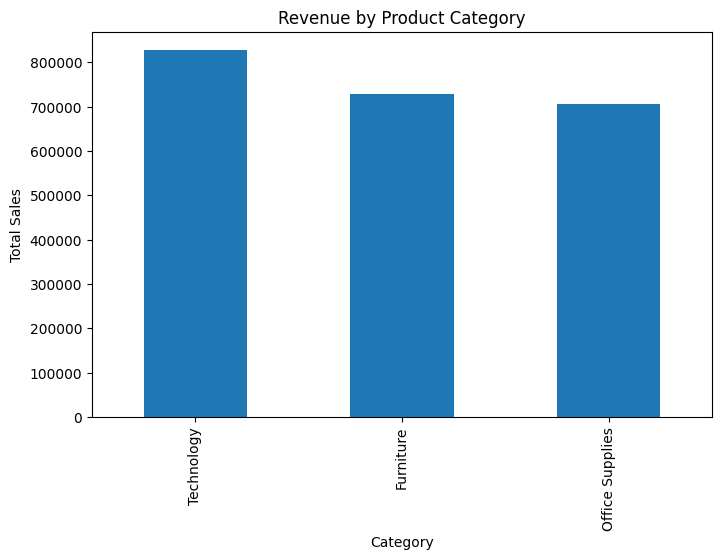

In [60]:
plt.figure(figsize=(8, 5))
category_sales.plot(kind='bar')
plt.title('Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()


### Category Insights

- The Technology category generates the highest revenue, making it the primary
  driver of overall sales.
- Furniture and Office Supplies contribute moderately but consistently.
- High-value categories should be prioritized for inventory planning and
  targeted marketing strategies.


## Regional Performance Analysis

This section evaluates sales performance across regions to identify
top-performing and underperforming markets.


In [61]:
region_sales = (
    df.groupby('Region')['Sales']
    .sum()
    .sort_values(ascending=False)
)

region_sales


Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64

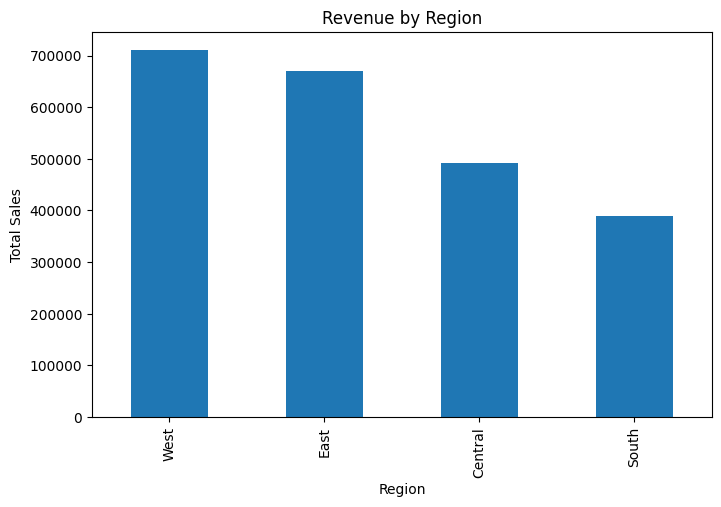

In [62]:
plt.figure(figsize=(8, 5))
region_sales.plot(kind='bar')
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()


### Regional Insights

- The West region records the highest sales, indicating strong market demand.
- The East and Central regions show moderate performance.
- The South region underperforms compared to others, highlighting potential
  opportunities for market expansion and targeted campaigns.


## Key Business Insights

1. Sales revenue has shown consistent growth over the years, with strong
   seasonality observed in the last quarter of each year.
2. A small group of products contributes a significant portion of total revenue,
   indicating concentration among top-performing items.
3. The Technology category is the highest revenue generator, making it a key
   driver of business performance.
4. Regional analysis shows strong performance in the West region, while the
   South region lags behind other regions.


## Actionable Business Recommendations

1. Increase inventory availability and marketing focus for top-selling products
   to maximize revenue from high-performing items.
2. Prioritize the Technology category for future product expansion and promotions
   due to its strong revenue contribution.
3. Leverage seasonal trends by planning targeted campaigns during peak months,
   especially in the final quarter of the year.
4. Implement region-specific marketing strategies to improve performance in the
   South region and capitalize on growth opportunities.
